In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format("channels_last")
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## importing the training dataset 
### have taken the datasets from kaggle of intel dataset 
### train datasets are named as seg train
path = "/content/drive/MyDrive/intel_dataset/seg_train"
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 14052 images belonging to 6 classes.


In [ ]:
## dimensions of the first image and its associated output in the first batch.

print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 6)
Image Size of first image :  (227, 227, 3)
Output of first image :  (6,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0.]')

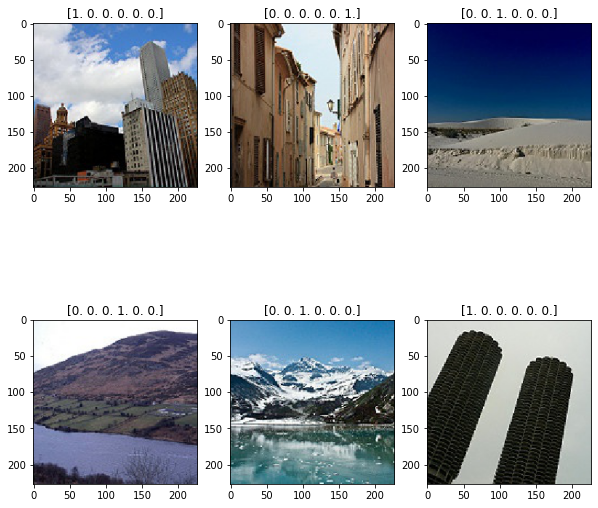

In [ ]:
## checking some examples from the dataset

fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
## construct  our AlexNet Deep Learning Network:-

def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
## printing the summary of the ALEXNET model 
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

## training the model using fit_generator()

In [ ]:
alex.fit_generator(train,epochs=10) ### we are using here 10 epochs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
440/440 [==============================] - 2945s 7s/step - loss: 2.1825 - accuracy: 0.5186
Epoch 2/10
440/440 [==============================] - 56s 126ms/step - loss: 0.9483 - accuracy: 0.6387
Epoch 3/10
440/440 [==============================] - 65s 148ms/step - loss: 0.7608 - accuracy: 0.7242
Epoch 4/10
440/440 [==============================] - 62s 140ms/step - loss: 0.6567 - accuracy: 0.7663
Epoch 5/10
440/440 [==============================] - 61s 138ms/step - loss: 0.5830 - accuracy: 0.7943
Epoch 6/10
440/440 [==============================] - 55s 124ms/step - loss: 0.5534 - accuracy: 0.8044
Epoch 7/10
440/440 [==============================] - 56s 127ms/step - loss: 0.5017 - accuracy: 0.8237
Epoch 8/10
440/440 [==============================] - 55s 126ms/step - loss: 0.4703 - accuracy: 0.8338
Epoch 9/10
440/440 [==============================] - 55s 125ms/step - loss: 0.4568 - accuracy: 0.8397
Epoch 10/10
440/440 [==============================] - 55s 126ms/step - lo

 ## load test data to get test accuracy

In [ ]:
 ### seg test are our validation datsets 
 
 path_test = "/content/drive/MyDrive/intel_dataset/seg_test"
 test_datagen = ImageDataGenerator(rescale=1. / 255)
 test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 3010 images belonging to 6 classes.


In [ ]:
 ## displaying accuracy and loss on the test data 
 preds = alex.evaluate_generator(test)
 print ("Loss = " + str(preds[0]))
 print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Loss = 1.2943999767303467
Test Accuracy = 0.6139534711837769


In [ ]:
## loading the prediction data that is "seg_pred" on which we have to predict :-

path_pred = "/content/drive/MyDrive/intel_dataset/seg_pred"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 7301 images belonging to 1 classes.


In [ ]:
## using predict_generator() function to predict 
predictions = alex.predict_generator(predict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


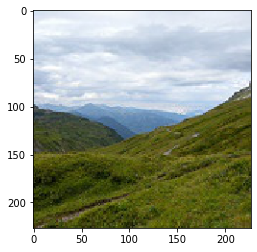

In [ ]:
imshow(predict[702][0][0])

In [ ]:
print(predictions[702]) ### this is giving the probabilities of every class for 702th image 

[2.6123534e-04 2.7370428e-05 9.3322390e-01 6.0048345e-02 3.7787892e-03
 2.6604233e-03]


In [ ]:
import os 
def get_category(predicted_output):
    path ="/content/drive/MyDrive/intel_dataset/seg_train"
    return os.listdir(path)[np.argmax(702)]

In [ ]:
print(get_category(predictions[702]))

sea


Text(0.5, 1.0, 'sea')

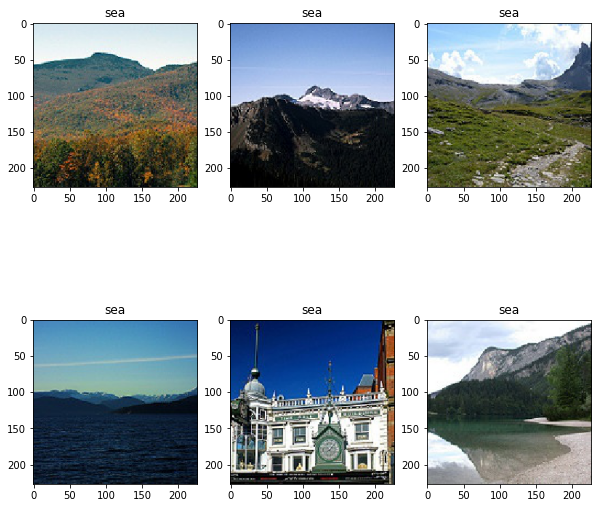

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[6][0][0])
axs[1][0].set_title(get_category(predictions[6]))
axs[1][1].imshow(predict[7][0][0])
axs[1][1].set_title(get_category(predictions[7]))
axs[1][2].imshow(predict[5][0][0])
axs[1][2].set_title(get_category(predictions[5]))